In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

city_data_to_load = "Documents/city_data.csv"
ride_data_to_load = "Documents/ride_data.csv"

city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

combined_data_df = pd.merge(city_data_df, ride_data_df,
                                 how='outer', on='city')
combined_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [21]:
avg_fare = combined_data_df.groupby("city")["fare"].mean()
avg_fare = pd.DataFrame(avg_fare).reset_index()
avg_fare = avg_fare.rename(columns = {'fare': 'avg_fare'})
#Total Number of Rides Per City
tot_rides = combined_data_df.groupby("city")["ride_id"].count()
tot_rides = pd.DataFrame(tot_rides).reset_index()
tot_rides = tot_rides.rename(columns = {'ride_id': 'total_rides'})
#Total Drivers
tot_drivers = combined_data_df[["city", "driver_count"]].drop_duplicates("city")
#City Type
city_type = combined_data_df[["city", "type"]].drop_duplicates("city")
final_df = pd.merge(pd.merge(pd.merge(avg_fare, tot_rides, on="city"), 
                             tot_drivers, on="city"), city_type, on="city")


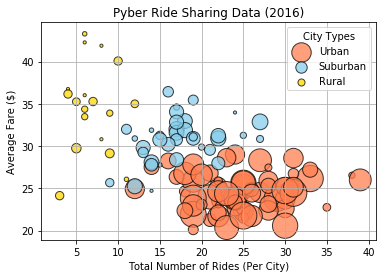

In [22]:
urban_group = final_df.loc[final_df['type'] == 'Urban']
suburban_group = final_df.loc[final_df['type'] == 'Suburban']
rural_group = final_df.loc[final_df['type'] == 'Rural']

#Bubble Plot
x1 = urban_group.plot(kind='scatter',x='total_rides', y='avg_fare',
                       color='coral', s=urban_group['driver_count']*10, label = 'Urban', 
                       alpha = 0.75, edgecolor = "black", linewidths = 1)    
x2 = suburban_group.plot(kind='scatter', x='total_rides', y='avg_fare', 
                          color='skyblue',s=suburban_group['driver_count']*10, label = 'Suburban', 
                          alpha = 0.75, edgecolor = "black", linewidths = 1, ax=x1)    
x3 = rural_group.plot(kind='scatter', x='total_rides', y='avg_fare', 
                       color='gold', s=rural_group['driver_count']*10, label = 'Rural', 
                       alpha = 0.75, edgecolor = "black", linewidths = 1, ax=x1)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend(title = 'City Types')
plt.grid()
plt.savefig("Pictures/PyberBubble.png")
plt.show()



In [23]:
tot_fares = combined_data_df["fare"].sum()
urban_fare = combined_data_df.loc[combined_data_df["type"] == "Urban", "fare"].sum()
rural_fare = combined_data_df.loc[combined_data_df["type"] == "Rural", "fare"].sum()
suburban_fare = combined_data_df.loc[combined_data_df["type"] == "Suburban", "fare"].sum()
urban_fare_p = (urban_fare/tot_fares)
rural_fare_p = (rural_fare/tot_fares)
suburban_fare_p = (suburban_fare/tot_fares)

In [24]:
labels = ["Urban", "Suburban", "Rural"]
pie_p = [urban_fare_p, suburban_fare_p, rural_fare_p]
colors = ["coral", "skyblue", "gold"]
explode = (0.1, 0, 0)


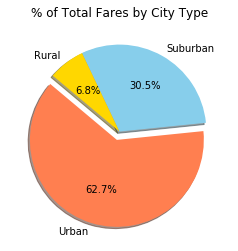

In [25]:
plt.pie(pie_p, explode=explode, labels=labels, colors=colors,
        autopct="%0.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")
plt.savefig("Pictures/PyberFarePie.png")
plt.show()

In [26]:
final_tot_rides = len(combined_data_df)
urban_rides = (combined_data_df.loc[combined_data_df["type"] == "Urban", "ride_id"].count()/final_tot_rides) * 100
rural_rides = (combined_data_df.loc[combined_data_df["type"] == "Rural", "ride_id"].count()/final_tot_rides) * 100
suburban_rides = (combined_data_df.loc[combined_data_df["type"] == "Suburban", "ride_id"].count()/final_tot_rides) * 100


In [27]:
labels2 = ["Urban","Suburban","Rural"]
colors2 = ["coral", "skyblue", "gold"]
pie_r = [urban_rides, suburban_rides, rural_rides]
explode2 = (0, 0, 0)  

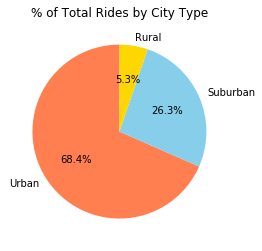

In [28]:
plt.pie(pie_r, explode=explode2, labels=labels2, colors=colors2,
        autopct="%0.1f%%", shadow=False, startangle=90)
plt.title("% of Total Rides by City Type")
plt.savefig("Pictures/PyberRidesPie.png")
plt.show()

In [29]:
final_tot_drivers = final_df["driver_count"].sum()
urban_drivers = (final_df.loc[final_df["type"] == "Urban", "driver_count"].sum()/final_tot_drivers)* 100
rural_drivers = (final_df.loc[final_df["type"] == "Rural", "driver_count"].sum()/final_tot_drivers)* 100
suburban_drivers = (final_df.loc[final_df["type"] == "Suburban", "driver_count"].sum()/final_tot_drivers)* 100

In [30]:
labels3 = ["Urban","Suburban","Rural"]
colors3 = ["coral", "skyblue", "gold"]
pie_d = [urban_drivers, suburban_drivers, rural_drivers]
explode3 = (0.5, 0, 0)

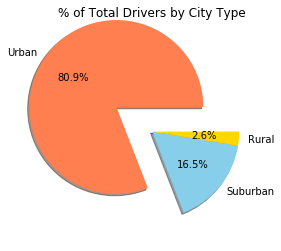

In [31]:
plt.pie(pie_d, explode=explode3, labels=labels3, colors=colors3,
        autopct="%0.1f%%", shadow=True, startangle=0)
plt.title("% of Total Drivers by City Type")
plt.savefig("Pictures/PyberDriversPie.png")
plt.show()